# 03 - Mapping Mortality Rates
### by Ian Flores Siaca
##### October 2018

## Purpose of this Notebook

#### Learning
* Handling of Spatial Data in Python with `geopandas`
* Visualizing Spatial Data
* Joining data from different sources

#### Project
* Visualize the spatial distribution of the mortality rates
* Analyze spatial patterns in the data

## Let's code

#### Load the libraries
* Here we see the `%matplotlib inline` command, this tells the matplotlib package to display the plots in this notebook. 
* We are seeing as well the  `geopandas` library for the first time. This is a very useful library to handle spatial data in Python. 

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import unidecode
import os

#### Get the data
* We are downloading a GeoJSON file, which is a text file formatted to contain spatial information by hierarchies. 
* This GeoJSON is available from Miguel Rios GitHub repository. 

In [22]:
os.system("wget 'https://raw.githubusercontent.com/miguelrios/atlaspr/master/geotiles/pueblos.json'")
os.system("mv 'pueblos.json' '../data/'")

0

In [23]:
geo_muni = gpd.read_file('../data/pueblos.json')
geo_muni.head()

STATE COUNTY          NAME  \
0    72    071       Isabela   
1    72    005     Aguadilla   
2    72    013       Arecibo   
3    72    065       Hatillo   
4    72    115  Quebradillas   

                                            geometry  
0  POLYGON ((-67.10327599999999 18.513426, -67.10...  
1  POLYGON ((-67.10327599999999 18.513426, -67.10...  
2  POLYGON ((-66.58677804052712 18.48494807068136...  
3  POLYGON ((-66.76483496560731 18.48406974021553...  
4  POLYGON ((-66.90143020590587 18.48455227031116...

On the `geometry` column we see a `POLYGON` object which is a spatial object that defines the boundary coordinates of the municipalities.

#### Plot the municipalities
* Calling the GeoDataFrame by its name with the `.plot()` object, will plot the geometry column which in this case is our polygons of the municipalities

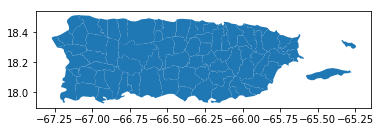

In [5]:
geo_muni.plot()

#### Cleaning the municipalities name
* This is the same procedure as in notebook_01. 

In [24]:
municipalities = []

for i in range(0, 78):
    muni_raw = geo_muni['NAME'][i].split(" Municipio, Puerto Rico")[0]
    muni_clean = unidecode.unidecode(muni_raw)
    muni_upper = muni_clean.upper()
    municipalities.append(muni_upper)
    
geo_muni['NAME'] = municipalities

#### Loading Census Data

In [7]:
census_data = pd.read_csv("../data/census.csv")
census_data = census_data.drop(['Unnamed: 0'], axis = 1)
census_data.head()

ResidencePlace  respop72017
0       ADJUNTAS        17971
1         AGUADA        38118
2      AGUADILLA        53164
3   AGUAS BUENAS        25850
4       AIBONITO        23108

#### Loading Mortality Data

In [25]:
mortality_data = pd.read_csv("../data/mortality_grouped.csv")
mortality_data = mortality_data.drop(['Unnamed: 0'], axis = 1)
mortality_data.head()

ResidencePlace ResidenceZone  Deaths
0       ADJUNTAS         RURAL      63
1       ADJUNTAS        URBANO      50
2         AGUADA         RURAL     165
3         AGUADA        URBANO      37
4      AGUADILLA         RURAL     320

#### Calculating mortality rates
* We first join the census data to the mortality DataFrame. This order matters as the mortality DataFrame has more information than the census data. 
* We then divide the number of deaths by the number of people in each municipality and the multiply by 1000 to get the mortality rate per 1000 people. 

In [11]:
df = mortality_data.merge(census_data, on='ResidencePlace')
df['death_rate'] = (df['Deaths']/df['respop72017']) * 1000
df.head()

ResidencePlace ResidenceZone  Deaths  respop72017  death_rate
0       ADJUNTAS         RURAL      63        17971    3.505648
1       ADJUNTAS        URBANO      50        17971    2.782260
2         AGUADA         RURAL     165        38118    4.328664
3         AGUADA        URBANO      37        38118    0.970670
4      AGUADILLA         RURAL     320        53164    6.019111

####  Join the mortality data and the spatial data

In [13]:
geo_muni['death_rate'] = list(df.groupby(['ResidencePlace'])['death_rate'].sum())

#### Let's plot the death rate by municipality and compare it with the trajectory of the hurricane

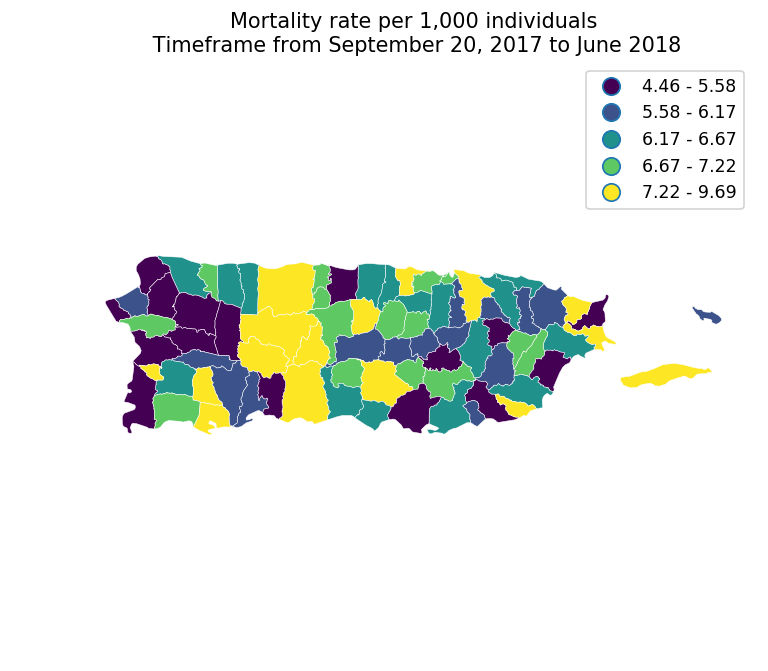

In [20]:
figure, ax = plt.subplots(1)

geo_muni.plot(column = 'death_rate', 
              scheme = 'quantiles', 
              legend = True, 
              ax = ax,
              edgecolor='1', 
              linewidth = 0.3)

fig = plt.gcf()
fig.set_size_inches(7, 6)
fig.set_dpi(125)
plt.title("Mortality rate per 1,000 individuals\n Timeframe from September 20, 2017 to June 2018")
ax.set_axis_off()

plt.axis('equal')
plt.show()

![](https://raw.githubusercontent.com/ian-flores/Hurricane_Maria_Mortality_Analysis/master/doc/presentation_DSCI_542/imgs/nytimes-trayectory.png)
Source: NYTimes

## Optional Questions

1) Do you see a pattern between the trajectory of the Hurricane and the mortality rates' spatial distribution?

2) Do you see a difference between rural zones and urban zones? Their means? Their variances? Maybe remember the `groupby` function to do this step. We will go way more in depth in the next notebook.

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.